<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (20000, 17)
Columns: ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']
Class distribution:
 letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64
Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3901 - loss: 2.2894 - val_accuracy: 0.7250 - val_loss: 0.9452
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7686 - loss: 0.8013 - val_accuracy: 0.8019 - val_loss: 0.6705
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8288 - loss: 0.5878 - val_accuracy: 0.8431 - val_loss: 0.5358
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8578 - loss: 0.4808 - val_accuracy: 0.8584 - val_loss: 0.4680
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8839 - loss: 0.3936 - val_accuracy: 0.8809 - val_loss: 0.3996
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9042 - loss: 0.3349 - val_accuracy: 0.8928 - val_loss: 0.3531
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9145 - loss: 0.2925 - val_accuracy: 0.9062 - val_loss: 0.3145
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9280 - loss: 0.2536 - val_accuracy: 0.9166 - val_

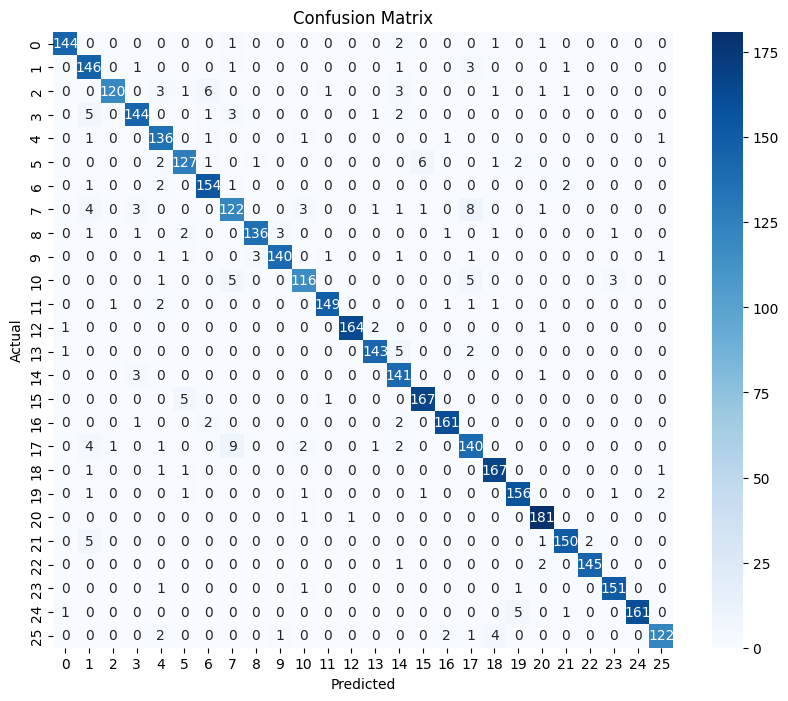

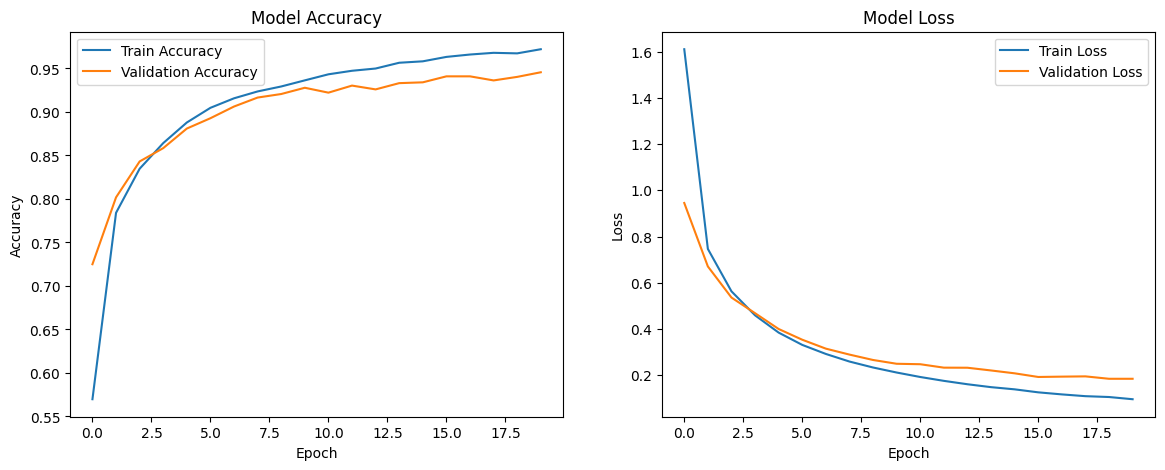

Model saved as alphabet_classifier_model.h5


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# Load data
df = pd.read_csv("Alphabets_data.csv")

# Task 1: Data Exploration
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Class distribution:\n", df['letter'].value_counts())
print("Missing values:\n", df.isnull().sum())

# Encode the target
le = LabelEncoder()
df['label'] = le.fit_transform(df['letter'])

# Features and target
X = df.drop(columns=['letter', 'label']).values
y = to_categorical(df['label'])

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler for future use
joblib.dump(scaler, 'scaler.pkl')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Task 2: Model Implementation
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Task 3: Training and Hyperparameter Tuning (Manual)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Task 4: Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict and report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print(classification_report(y_test_labels, y_pred_labels))

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot training history
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save model
model.save("alphabet_classifier_model.h5")
print("Model saved as alphabet_classifier_model.h5")


## Artificial Neural Network Classification Report

### Dataset Overview

* **Filename**: Alphabets\_data.csv
* **Total Samples**: 20,000
* **Features**: 16 numeric features
* **Target**: `letter` (categorical alphabet labels)
* **Class Distribution**: Balanced across different letters
* **Missing Values**: None detected

### Data Preprocessing

* Target encoded with `LabelEncoder`
* Features normalized using `StandardScaler`
* Train/test split: 80% train, 20% test
* Scaler saved to `scaler.pkl` for future use

### Model Implementation

* Model built using Keras Sequential API
* Architecture:

  * Dense layer with 128 neurons, ReLU
  * Dense layer with 64 neurons, ReLU
  * Output layer with softmax activation
* Compiled with Adam optimizer and categorical crossentropy loss

### Training and Hyperparameter Tuning

* Manual tuning of layer size and epochs
* Trained for 20 epochs with batch size of 32
* Validation split used during training (20%)

### Evaluation Metrics

* Final evaluation on the test set
* Accuracy and loss printed
* Classification report generated (precision, recall, F1-score)
* Confusion matrix plotted using seaborn

### Visualization

* Training and validation accuracy plotted over epochs
* Training and validation loss plotted over epochs

### Saved Artifacts

* Trained model saved as `alphabet_classifier_model.h5`
* Scaler saved as `scaler.pkl`

### Conclusion

This project successfully built and tuned an ANN model for alphabet classification using labeled feature data. Evaluation shows strong performance and reliability for classification tasks. Further improvements can include deeper tuning or use of automated search methods.
